# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
alquilar = pd.read_csv("data\\comprar_alquilar.csv")

In [3]:
alquilar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
alquilar

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

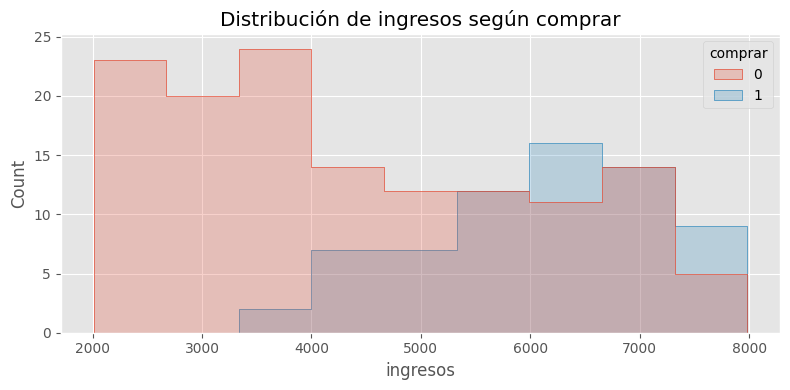

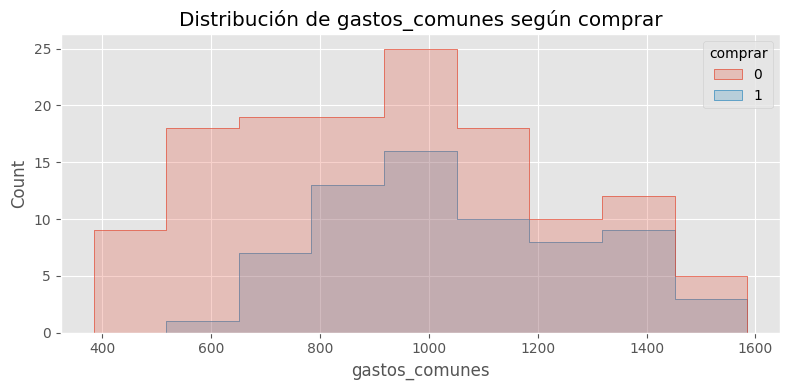

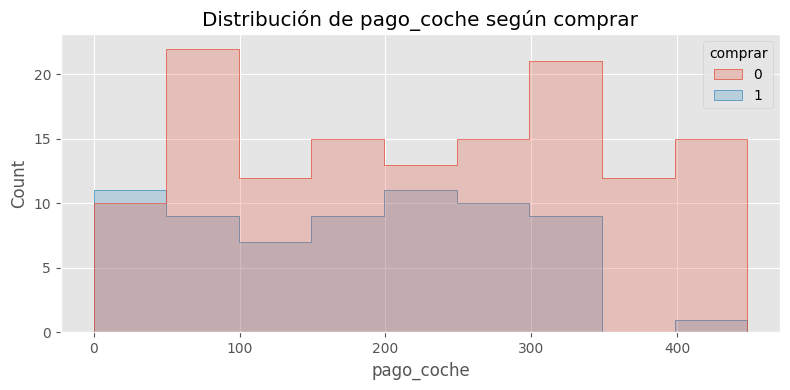

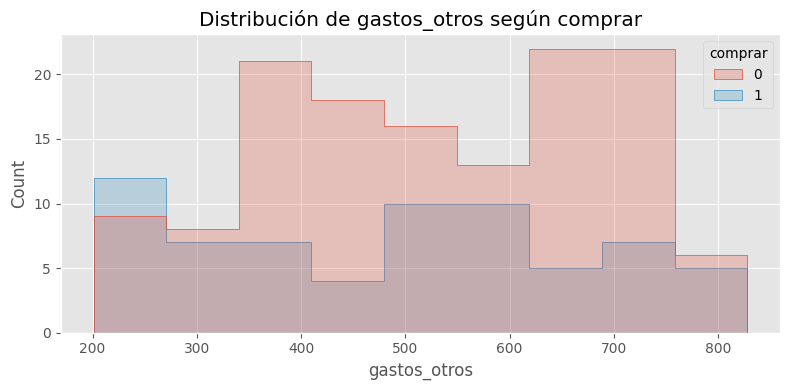

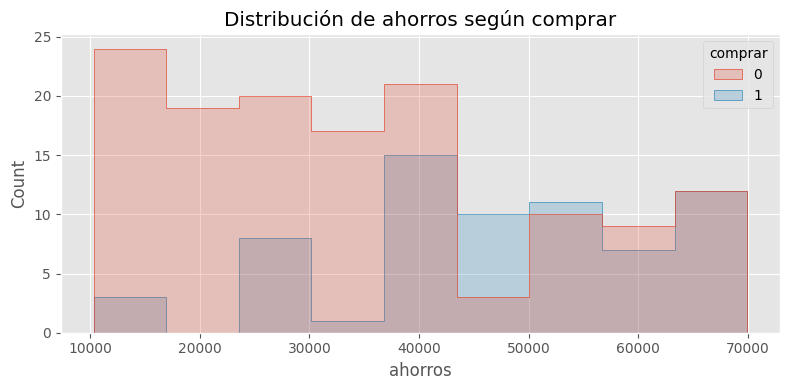

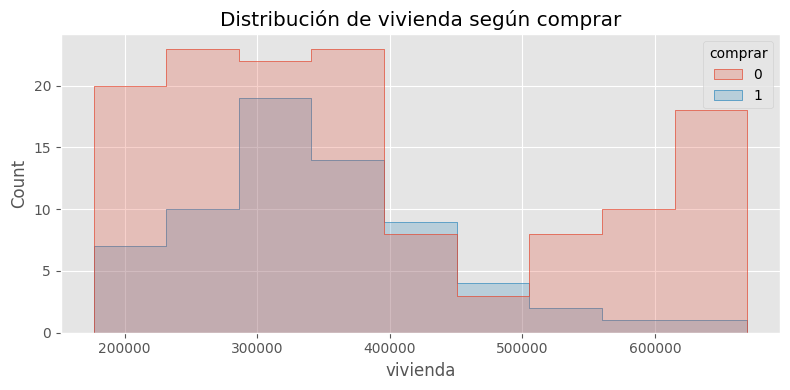

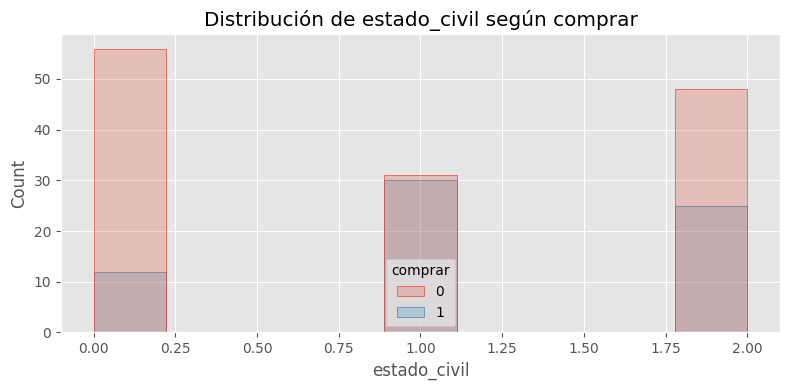

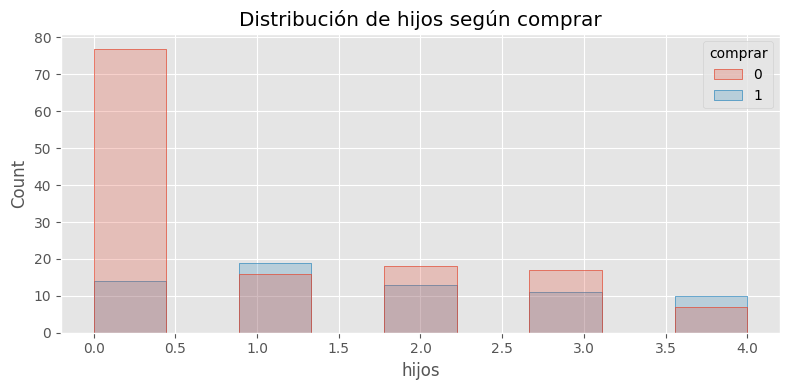

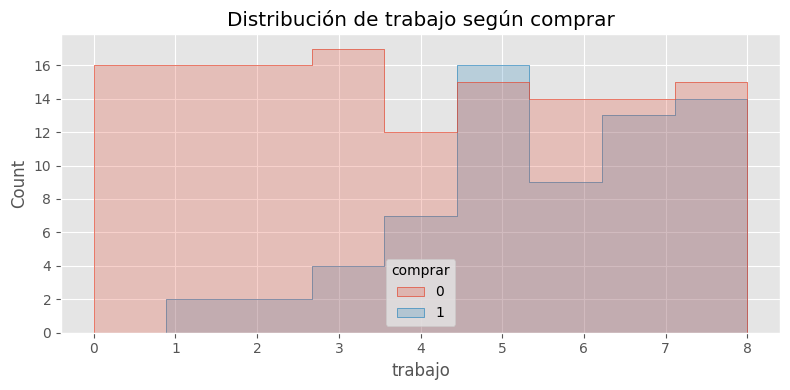

In [5]:
columnas = alquilar.columns.drop("comprar")

for col in columnas:
    plt.figure(figsize=(8, 4))
    
    if pd.api.types.is_numeric_dtype(alquilar[col]):
        sns.histplot(data=alquilar, x=col, hue="comprar", kde=False, element='step', stat='count', common_norm=False)
        plt.title(f'Distribución de {col} según comprar')
    
    plt.tight_layout()
    plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [9]:
escalador = StandardScaler()
alqui_escal = escalador.fit_transform(alquilar)

In [ ]:
alqui_escal

array([[ 0.62012866,  0.10468863, -1.69895439, ...,  0.5623736 ,
        -0.98441983,  1.41948067],
       [ 1.0639266 , -0.10162457, -0.71204191, ...,  1.29527339,
         0.59691461, -0.704483  ],
       [ 0.89117304,  0.22626604, -0.91263388, ..., -0.17052619,
         1.38758182,  1.41948067],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ...,  1.29527339,
         1.38758182, -0.704483  ],
       [-0.96801269, -0.38530521,  1.26178306, ...,  0.5623736 ,
         0.201581  , -0.704483  ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -0.90342598,
        -0.19375261, -0.704483  ]])

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [14]:
pca = PCA(n_components= 9)

In [15]:
modelo = pca.fit(alqui_escal)

In [16]:
modelo

PCA(n_components=9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [18]:
modelo.explained_variance_

array([2.75045423, 2.40778854, 1.10457811, 1.04628942, 0.91509638,
       0.73891023, 0.46003842, 0.27586932, 0.24814067])

In [19]:
modelo.explained_variance_.cumsum()

array([2.75045423, 5.15824277, 6.26282088, 7.3091103 , 8.22420668,
       8.96311691, 9.42315533, 9.69902464, 9.94716531])

In [24]:
modelo.explained_variance_ratio_

array([0.27368381, 0.23958688, 0.10991099, 0.10411098, 0.09105662,
       0.07352523, 0.0457761 , 0.02745036, 0.02469122])

##### Los 5 primeros componentes explican 8.22 de varianza acumulada

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27368381 0.51327069 0.62318168 0.72729266 0.81834928 0.8918745
 0.9376506  0.96510097 0.98979219]


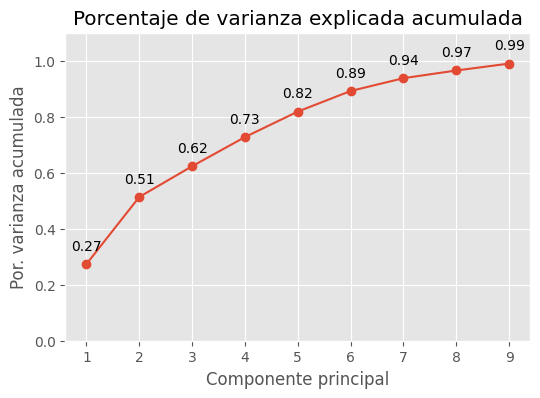

In [26]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================

prop_varianza_acum = modelo.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(
    np.arange(1, modelo.n_components_ + 1),
    prop_varianza_acum,
    marker='o'
)

for x, y in zip(np.arange(1, modelo.n_components_ + 1), prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(1, modelo.n_components_ + 1))
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [27]:
componentes = modelo.components_

In [28]:
df_componentes = pd.DataFrame(componentes, columns=alquilar.columns)

In [29]:
df_componentes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,0.549343,0.341460,-0.150491,-0.117465,0.489396,0.441293,-0.153442,-0.140073,-0.161600,0.204091
1,0.159098,0.055850,-0.076581,0.005565,0.135533,-0.073277,0.453844,0.524006,0.551721,0.396210
2,0.015479,-0.270363,0.169250,0.585070,0.225149,0.495919,0.147870,0.186289,0.071546,-0.444294
3,0.116159,0.249112,0.789679,-0.401542,-0.093508,0.124575,0.260397,-0.041123,0.065694,-0.203828
4,0.133790,0.525504,0.292144,0.660085,-0.167576,-0.281993,-0.196322,-0.002478,-0.030011,0.194513
5,-0.057321,0.585072,-0.470722,-0.039776,-0.315515,0.139044,0.306505,0.079488,-0.008611,-0.460459
6,0.060758,-0.109744,-0.044617,0.206281,0.057104,-0.113755,0.712110,-0.581456,-0.210120,0.184877
7,-0.062014,0.060982,-0.057275,0.032287,0.031747,0.068922,-0.196652,-0.568478,0.780884,-0.103614
8,-0.303171,0.227278,0.024930,-0.038606,0.738158,-0.461003,0.043414,0.039218,-0.028632,-0.304429


<Axes: >

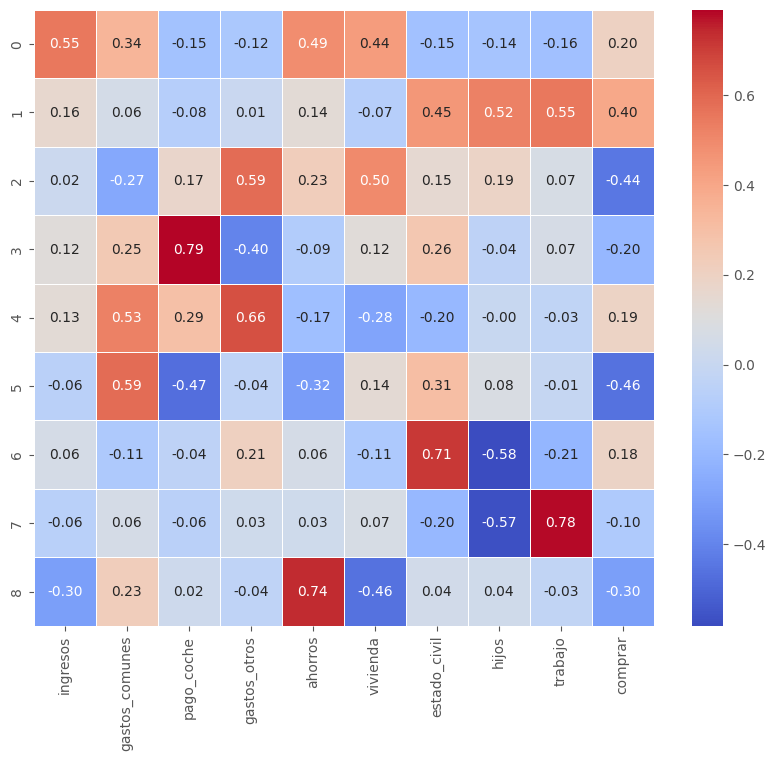

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_componentes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo